<a href="https://www.kaggle.com/code/shubhamgupta012/gre-admission-prediction?scriptVersionId=126447963" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/graduate-admissions/Admission_Predict.csv
/kaggle/input/graduate-admissions/Admission_Predict_Ver1.1.csv


In [2]:
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense

In [3]:
df = pd.read_csv('/kaggle/input/graduate-admissions/Admission_Predict_Ver1.1.csv')

In [4]:
df.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [5]:
df.shape

(500, 9)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Serial No.         500 non-null    int64  
 1   GRE Score          500 non-null    int64  
 2   TOEFL Score        500 non-null    int64  
 3   University Rating  500 non-null    int64  
 4   SOP                500 non-null    float64
 5   LOR                500 non-null    float64
 6   CGPA               500 non-null    float64
 7   Research           500 non-null    int64  
 8   Chance of Admit    500 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 35.3 KB


In [7]:
df.describe()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.00000,500.000000,500.000000,500.00000
mean,250.500000,316.472000,107.192000,3.114000,3.374000,3.48400,8.576440,0.560000,0.72174
std,144.481833,11.295148,6.081868,1.143512,0.991004,0.92545,0.604813,0.496884,0.14114
min,1.000000,290.000000,92.000000,1.000000,1.000000,1.00000,6.800000,0.000000,0.34000
25%,125.750000,308.000000,103.000000,2.000000,2.500000,3.00000,8.127500,0.000000,0.63000
50%,250.500000,317.000000,107.000000,3.000000,3.500000,3.50000,8.560000,1.000000,0.72000
75%,375.250000,325.000000,112.000000,4.000000,4.000000,4.00000,9.040000,1.000000,0.82000
max,500.000000,340.000000,120.000000,5.000000,5.000000,5.00000,9.920000,1.000000,0.97000


In [8]:
df.isnull().sum()

Serial No.           0
GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64

In [9]:
df.drop(columns=['Serial No.'],inplace=True)

In [10]:
df.sample(5)

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
402,324,109,3,3.5,3.0,8.94,1,0.78
461,301,102,3,2.5,2.0,8.13,1,0.68
405,302,99,3,2.5,3.0,7.45,0,0.52
455,305,102,2,1.5,2.5,7.64,0,0.59
257,324,100,3,4.0,5.0,8.64,1,0.78


In [11]:
X = df.iloc[:,0:-1]
Y = df.iloc[:,-1]

In [12]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2,random_state=1)

In [13]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [14]:
model = Sequential()

model.add(Dense(7,activation='relu',input_dim=7))
model.add(Dense(7,activation='relu'))
model.add(Dense(1,activation='linear'))

In [15]:
model.compile(loss='mean_squared_error',optimizer='Adam')

In [16]:
history = model.fit(X_train_scaled,Y_train,epochs=100,validation_split=0.2)

Epoch 1/100
10/10 [==============================] - 1s 24ms/step - loss: 0.0984 - val_loss: 0.0563
Epoch 2/100
10/10 [==============================] - 0s 5ms/step - loss: 0.0528 - val_loss: 0.0301
Epoch 3/100
10/10 [==============================] - 0s 5ms/step - loss: 0.0319 - val_loss: 0.0231
Epoch 4/100
10/10 [==============================] - 0s 5ms/step - loss: 0.0264 - val_loss: 0.0228
Epoch 5/100
10/10 [==============================] - 0s 5ms/step - loss: 0.0238 - val_loss: 0.0213
Epoch 6/100
10/10 [==============================] - 0s 5ms/step - loss: 0.0211 - val_loss: 0.0188
Epoch 7/100
10/10 [==============================] - 0s 5ms/step - loss: 0.0190 - val_loss: 0.0173
Epoch 8/100
10/10 [==============================] - 0s 5ms/step - loss: 0.0176 - val_loss: 0.0160
Epoch 9/100
10/10 [==============================] - 0s 5ms/step - loss: 0.0161 - val_loss: 0.0148
Epoch 10/100
10/10 [==============================] - 0s 5ms/step - loss: 0.0149 - val_loss: 0.0137
Epoch 11

In [17]:
y_pred = model.predict(X_test_scaled)

4/4 [==============================] - 0s 2ms/step


In [18]:
from sklearn.metrics import r2_score
r2_score(Y_test,y_pred)

0.8004303211306789

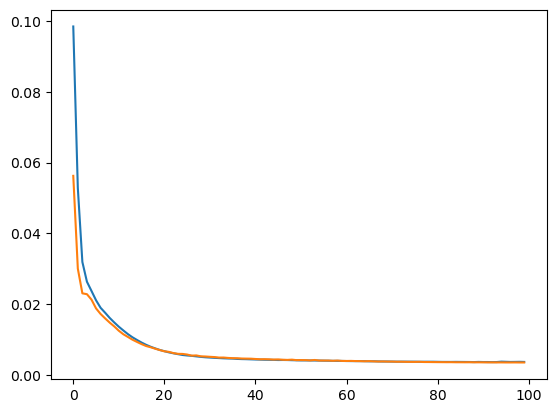

In [19]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])